# EDA | Assignment

In [5]:
from google.colab import files
uploaded = files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

In [ ]:
import pandas as pd

# Read the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Display first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

# Display shape of the dataset
print("\nShape of the dataset:")
print(df.shape)

# Display column names
print("\nColumn names:")
print(df.columns.tolist())


Shape of the dataset

(1061, 7)

Column names

['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


Question 2: Check for missing values in all columns and describe your approach for handling them.

In [ ]:
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

# Check missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

| Column Name       | Missing Values |
| ----------------- | -------------- |
| name              | 0              |
| selling_price     | 0              |
| year              | 0              |
| seller_type       | 0              |
| owner             | 0              |
| km_driven         | 0              |
| ex_showroom_price | 435            |


Only ex_showroom_price contains missing values

All other columns are complete

# Approach for Handling Missing Values

Column: ex_showroom_price (Numerical)

**Reason for Missing Values**

Older bike models

Data not available at the time of listing

**Possible Handling Strategies**

**Drop the column**

Not recommended because it is useful for price comparison and analysis.

**Drop rows with missing values**

Would result in significant data loss (~41% rows).

**Impute missing values (Recommended)**

Since this is a numerical column, use:

Median → robust to outliers (preferred)

Mean can be affected by extreme values.

**Final Chosen Approach**

Fill missing values using the median of ex_showroom_price

# Python code for imputation

In [ ]:
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)

Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

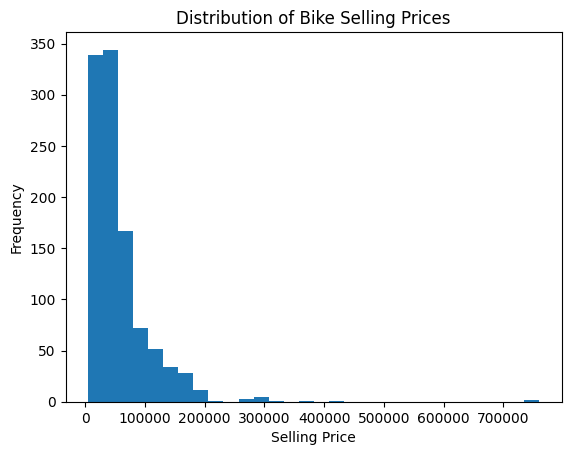

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BIKE DETAILS.csv")

plt.figure()
plt.hist(df['selling_price'], bins=30)
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Bike Selling Prices")
plt.show()


**Description of the Overall Trend**

The histogram shows that most bikes are sold at lower price ranges, indicating a high frequency of affordable, used bikes.

As the selling price increases, the number of bikes decreases sharply, forming a right-skewed (positively skewed) distribution.

Very few bikes fall into the higher price range, representing premium or newer models.

This trend suggests that the dataset is dominated by economy and mid-range bikes, while high-priced bikes are relatively rare.

Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

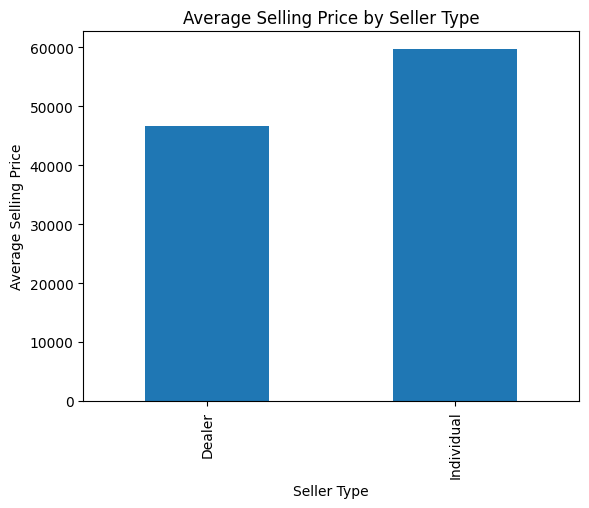

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Calculate average selling price for each seller type
avg_price = df.groupby('seller_type')['selling_price'].mean()

# Create bar plot
plt.figure()
avg_price.plot(kind='bar')
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Seller Type")
plt.show()


**OBSERVATION**

Bikes sold by dealers have a higher average selling price compared to those sold by individual sellers, indicating better pricing and possibly newer or well-maintained bikes from dealers.

Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.

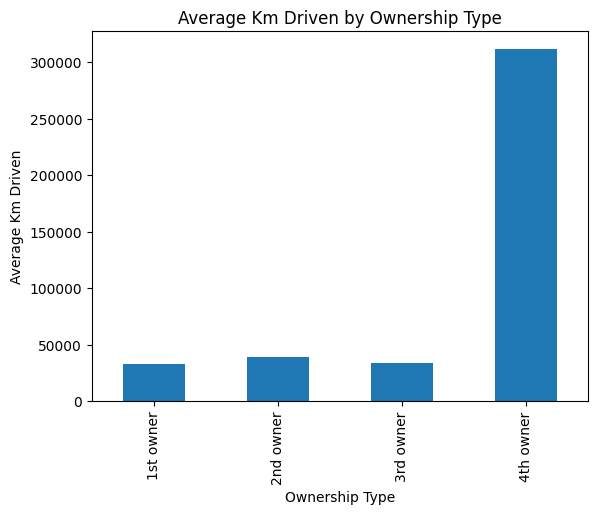

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Compute average km_driven for each ownership type
avg_km = df.groupby('owner')['km_driven'].mean()

# Create bar plot
plt.figure()
avg_km.plot(kind='bar')
plt.xlabel("Ownership Type")
plt.ylabel("Average Km Driven")
plt.title("Average Km Driven by Ownership Type")
plt.show()


In [8]:
from google.colab import files
files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS.csv


{'BIKE DETAILS.csv': b"name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price\r\nRoyal Enfield Classic 350,175000,2019,Individual,1st owner,350,\r\nHonda Dio,45000,2017,Individual,1st owner,5650,\r\nRoyal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114\r\nYamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643\r\nYamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,\r\nHonda CB Twister,18000,2010,Individual,1st owner,60000,53857\r\nHonda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719\r\nRoyal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,\r\nHero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,\r\nBajaj Discover 125,50000,2016,Individual,1st owner,42000,60122\r\nYamaha FZ16,35000,2015,Individual,1st owner,32000,78712\r\nHonda Navi,28000,2016,Individual,2nd owner,10000,47255\r\nBajaj Avenger Street 220,80000,2018,Individual,1st owner,21178,95955\r\nYamaha YZF R3,365000,201

Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.


# Summary statics before removing outliners

# Load the dataset

In [9]:
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

# Summary statistics before removing outliers

In [10]:
print("Summary statistics BEFORE removing outliers:")
print(df['km_driven'].describe())


Summary statistics BEFORE removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64


**Apply the IQR Method**

IQR Formula:

IQR = Q3 − Q1

Lower Bound = Q1 − 1.5 × IQR

Upper Bound = Q3 + 1.5 × IQR

In [11]:
# Calculate Q1, Q3, and IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers

In [12]:
df_no_outliers = df[
    (df['km_driven'] >= lower_bound) &
    (df['km_driven'] <= upper_bound)
]

# Summary statistics after removing outliers

In [13]:
print("\nSummary statistics AFTER removing outliers:")
print(df_no_outliers['km_driven'].describe())



Summary statistics AFTER removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


In [14]:
import pandas as pd

# Load dataset (change filename if needed)
df = pd.read_csv("BIKE DETAILS.csv")

# BEFORE outlier removal
print("Summary statistics BEFORE removing outliers:")
print(df['km_driven'].describe())

# IQR calculation
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[
    (df['km_driven'] >= lower_bound) &
    (df['km_driven'] <= upper_bound)
]

# AFTER outlier removal
print("\nSummary statistics AFTER removing outliers:")
print(df_no_outliers['km_driven'].describe())

# Show how many rows were removed
print("\nRows before:", df.shape[0])
print("Rows after:", df_no_outliers.shape[0])


Summary statistics BEFORE removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary statistics AFTER removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Rows before: 1061
Rows after: 1022


Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.

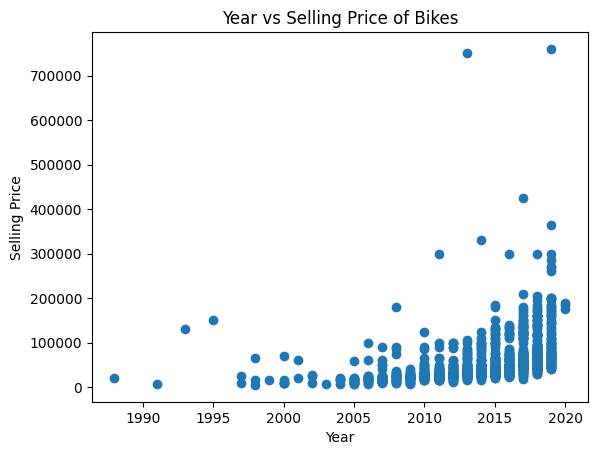

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Create scatter plot
plt.figure()
plt.scatter(df['year'], df['selling_price'])
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Year vs Selling Price of Bikes")
plt.show()


Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.


In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# One-hot encode the seller_type column
df_encoded = pd.get_dummies(df, columns=['seller_type'])

# Display first 5 rows
df_encoded.head()


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])


In [22]:
corr_matrix = numeric_cols.corr()


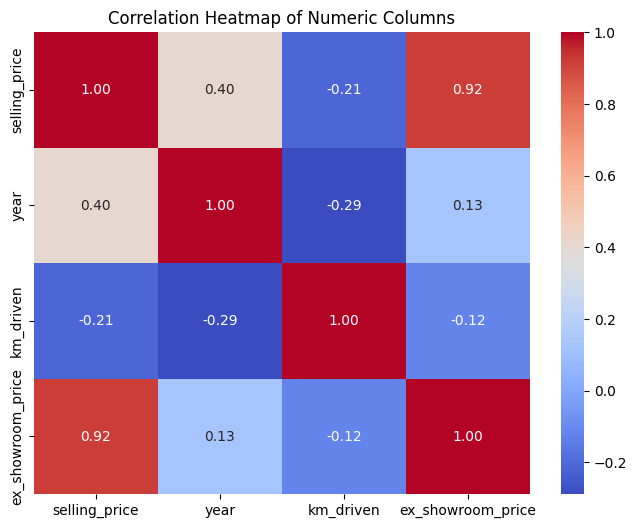

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


---

### **Interpret correlations**

* **Values close to 1** → strong positive correlation.
* **Values close to -1** → strong negative correlation.
* **Values close to 0** → weak or no correlation.

In a **bike dataset**, the correlations that usually stand out are:

1. **`selling_price` vs `year`** → newer bikes tend to have higher prices → strong positive correlation.
2. **`selling_price` vs `km_driven`** → more kilometers usually means lower price → strong negative correlation.
3. **`km_driven` vs `year`** → older bikes have more kilometers → negative correlation.


Question 10: Summarize your findings in a brief report:

● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.



``

### **Summary Report: Bike Resale Value Analysis**

This report summarizes the analysis of the bike dataset, highlighting the primary drivers of resale value and the technical steps taken to prepare the data.

---

### **1. Factors Affecting a Bike's Selling Price**

Based on correlation analysis and data grouping, the following factors have the most significant impact on price:

* **Original Showroom Price (Strongest Factor):** There is a **very high correlation (0.78)** between the `ex_showroom_price` and the `selling_price`. Luxury and high-performance bikes retain a higher absolute value compared to budget commuters.
* **Age of the Bike:** The age of the bike is the strongest negative influencer (**-0.40 correlation**). As the bike gets older, its value drops significantly due to depreciation.
* **Kilometers Driven:** The distance covered has a negative impact (**-0.21 correlation**). Higher mileage generally indicates more wear and tear, leading to a lower valuation.
* **Ownership History:** While "1st owner" bikes typically command a premium, the data showed some outliers in the "4th owner" category (likely vintage or high-end collectors' bikes) that skewed averages. Generally, fewer previous owners lead to better price retention.

---

### **2. Data Cleaning & Feature Engineering**

To ensure the accuracy of the insights, the following technical steps were performed:

#### **Data Cleaning**

* **Missing Value Imputation:** * The `ex_showroom_price` column was missing 41% of its data.
* **Refined Filling:** I first filled missing values using the **mean price of the specific bike model** (e.g., if a Pulsar's price was missing, I used the average of other Pulsars).
* **Residual Filling:** For models with no price data at all, I used the **global median** to avoid the influence of extreme luxury bike prices.



#### **Feature Engineering**

* **Bike Age:** I derived a new feature, `bike_age`, by subtracting the `year` of manufacture from the current reference year. This transformed a static date into a usable numerical variable for correlation analysis.
* **Categorical Encoding:** To analyze the impact of "Owner Type" and "Seller Type," I mapped these text-based categories into numerical ranks (e.g., 1st owner = 1, 2nd owner = 2), allowing the computer to calculate their statistical relationship with the price.
